### **Dataset Used:** Highway Traffic Videos Dataset
https://www.kaggle.com/datasets/aryashah2k/highway-traffic-videos-dataset

In [15]:
import zipfile
import os

# Define paths
unzip_dir = 'video_dataset/'

# Unzip the provided file
with zipfile.ZipFile('videos.zip', 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# List the contents of the unzipped directory
dataset_contents = os.listdir(unzip_dir)
dataset_contents

['cctv052x2004080619x00102.avi',
 'cctv052x2004080616x00049.avi',
 'cctv052x2004080613x00015.avi',
 'cctv052x2004080610x01881.avi',
 'cctv052x2004080519x01690.avi',
 'cctv052x2004080517x01665.avi',
 'cctv052x2004080612x00006.avi',
 'cctv052x2004080618x00079.avi',
 'cctv052x2004080610x01878.avi',
 'cctv052x2004080613x00010.avi',
 'cctv052x2004080615x00037.avi',
 'cctv052x2004080610x01879.avi',
 'cctv052x2004080607x01837.avi',
 'cctv052x2004080612x00003.avi',
 'cctv052x2004080614x00022.avi',
 'cctv052x2004080518x01669.avi',
 'cctv052x2004080610x01880.avi',
 'cctv052x2004080617x00064.avi',
 'cctv052x2004080608x01853.avi',
 'cctv052x2004080606x01828.avi',
 'cctv052x2004080518x01668.avi',
 'cctv052x2004080606x01833.avi',
 'cctv052x2004080609x01874.avi',
 'cctv052x2004080606x01826.avi',
 'cctv052x2004080613x00009.avi',
 'cctv052x2004080616x00051.avi',
 'cctv052x2004080613x00013.avi',
 'cctv052x2004080518x01670.avi',
 'cctv052x2004080617x00076.avi',
 'cctv052x2004080615x00034.avi',
 'cctv052x

In [18]:
# Define the path for the "video" directory
# List the contents of the "video" directory
video_files = os.listdir(unzip_dir)
video_dir_path = 'video_dataset'

# Get the number of video files, their formats, and sizes
video_details = []
for video_file in video_files:
    file_path = os.path.join(video_dir_path, video_file)
    file_size = os.path.getsize(file_path) / (1024 * 1024)  # Convert bytes to MB
    file_format = video_file.split('.')[-1]
    video_details.append((video_file, file_format, file_size))

# Display the details for the first few video files for brevity
video_details[:5], len(video_files)

([('cctv052x2004080619x00102.avi', 'avi', 0.12384796142578125),
  ('cctv052x2004080616x00049.avi', 'avi', 0.10475921630859375),
  ('cctv052x2004080613x00015.avi', 'avi', 0.12435150146484375),
  ('cctv052x2004080610x01881.avi', 'avi', 0.11605072021484375),
  ('cctv052x2004080519x01690.avi', 'avi', 0.12091827392578125)],
 254)

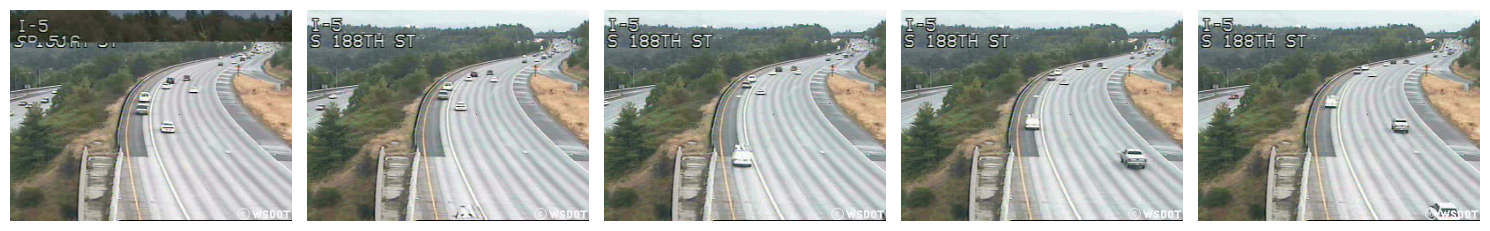

In [19]:
import cv2
import matplotlib.pyplot as plt

# Function to extract frames from a video
def extract_frames(video_path, num_frames=5):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_step = total_frames // num_frames

    extracted_frames = []
    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * frame_step)
        ret, frame = cap.read()
        if ret:
            # Convert BGR to RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            extracted_frames.append(frame)

    cap.release()
    return extracted_frames

# Select one of the video files for frame extraction
sample_video_path = os.path.join(video_dir_path, video_files[0])

# Extract frames
frames = extract_frames(sample_video_path)

# Visualize the extracted frames
fig, axes = plt.subplots(1, len(frames), figsize=(15, 5))
for ax, frame in zip(axes, frames):
    ax.imshow(frame)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [20]:
# Function to get frame resolution of a video
def get_frame_resolution(video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return (width, height)

# Sample a subset of videos for checking frame resolution
sample_video_files = video_files[:10]  # Sampling first 10 videos for brevity
resolutions = [get_frame_resolution(os.path.join(video_dir_path, video_file)) for video_file in sample_video_files]

resolutions

[(320, 240),
 (320, 240),
 (320, 240),
 (320, 240),
 (320, 240),
 (320, 240),
 (320, 240),
 (320, 240),
 (320, 240),
 (320, 240)]

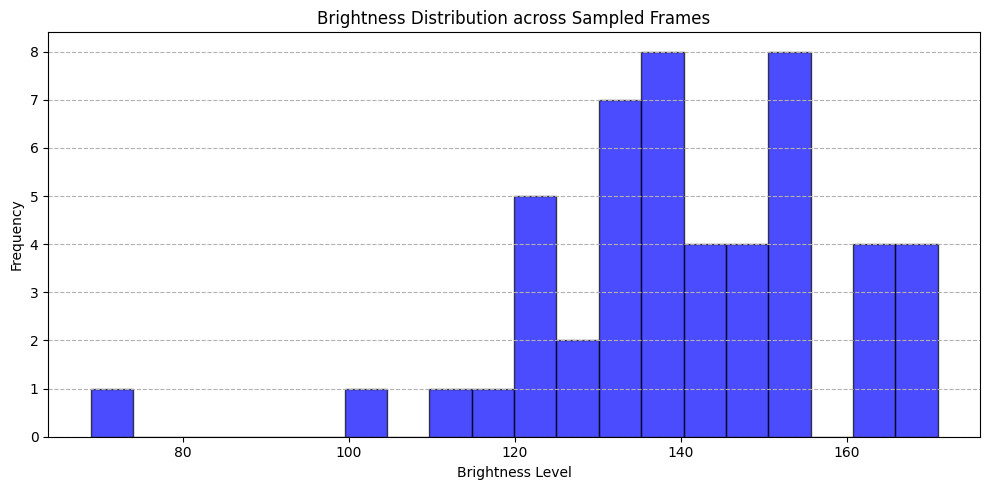

In [21]:
# Function to calculate average brightness of a frame
def calculate_brightness(frame):
    return frame.mean()

# Function to get average brightness of frames in a video
def get_video_brightness(video_path, num_frames=5):
    frames = extract_frames(video_path, num_frames=num_frames)
    return [calculate_brightness(frame) for frame in frames]

# Sample brightness from a subset of videos
brightness_values = [get_video_brightness(os.path.join(video_dir_path, video_file)) for video_file in sample_video_files]

# Flatten the list and visualize the distribution
flat_brightness = [brightness for sublist in brightness_values for brightness in sublist]

# Plotting the brightness distribution
plt.figure(figsize=(10, 5))
plt.hist(flat_brightness, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Brightness Distribution across Sampled Frames")
plt.xlabel("Brightness Level")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

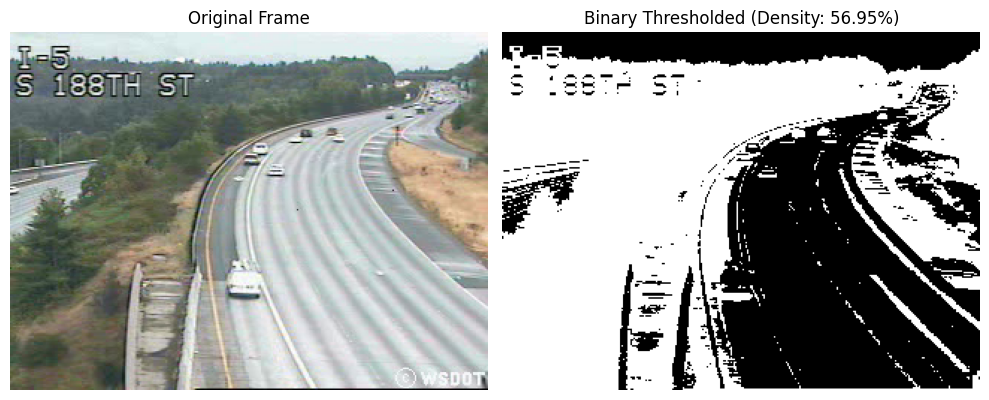

In [22]:
# Function to estimate vehicle density in a frame using binary thresholding
def estimate_vehicle_density(frame, threshold_value=180):
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply binary thresholding
    _, binary_frame = cv2.threshold(gray_frame, threshold_value, 255, cv2.THRESH_BINARY_INV)

    # Calculate the proportion of white pixels (potential vehicles)
    vehicle_density = binary_frame.mean() / 255.0
    return vehicle_density, binary_frame

# Sample a frame for vehicle density estimation
sample_frame = frames[2]
density, binary_representation = estimate_vehicle_density(sample_frame)

# Visualize the original and binary thresholded frames
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(sample_frame)
ax1.set_title("Original Frame")
ax1.axis('off')

ax2.imshow(binary_representation, cmap='gray')
ax2.set_title(f"Binary Thresholded (Density: {density:.2%})")
ax2.axis('off')

plt.tight_layout()
plt.show()

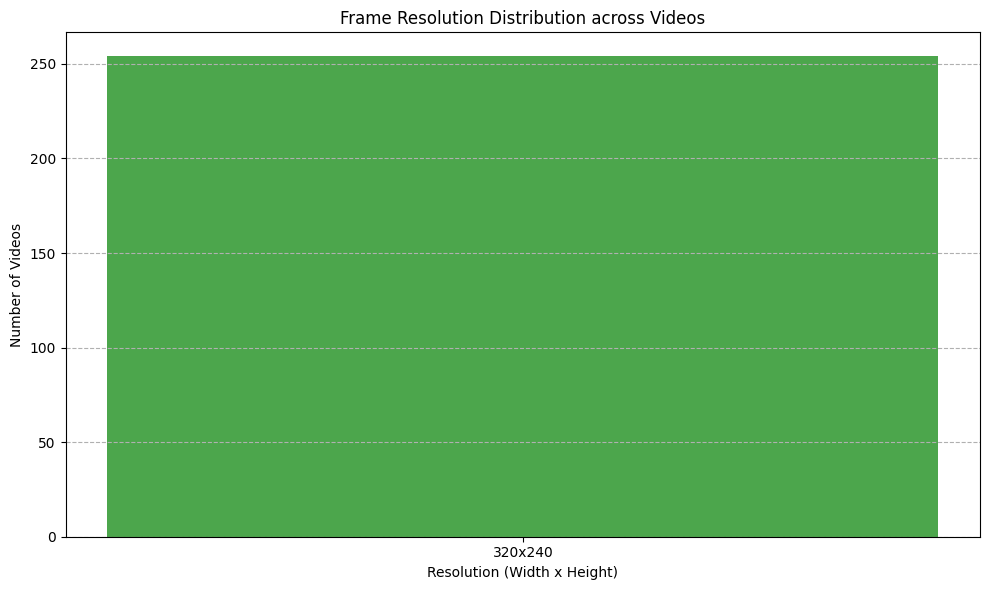

In [24]:
# Get frame resolutions for all videos in the dataset (this might take some time)
all_resolutions = [get_frame_resolution(os.path.join(video_dir_path, video_file)) for video_file in video_files]

# Count the occurrences of each resolution
resolution_counts = {}
for res in all_resolutions:
    resolution_counts[res] = resolution_counts.get(res, 0) + 1

# Plotting the frame resolution distribution
# Correcting the visualization for frame resolution distribution

# Convert labels to string format for better visualization
labels_str = [f"{res[0]}x{res[1]}" for res in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels_str, values, color='green', alpha=0.7)
plt.title("Frame Resolution Distribution across Videos")
plt.xlabel("Resolution (Width x Height)")
plt.ylabel("Number of Videos")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

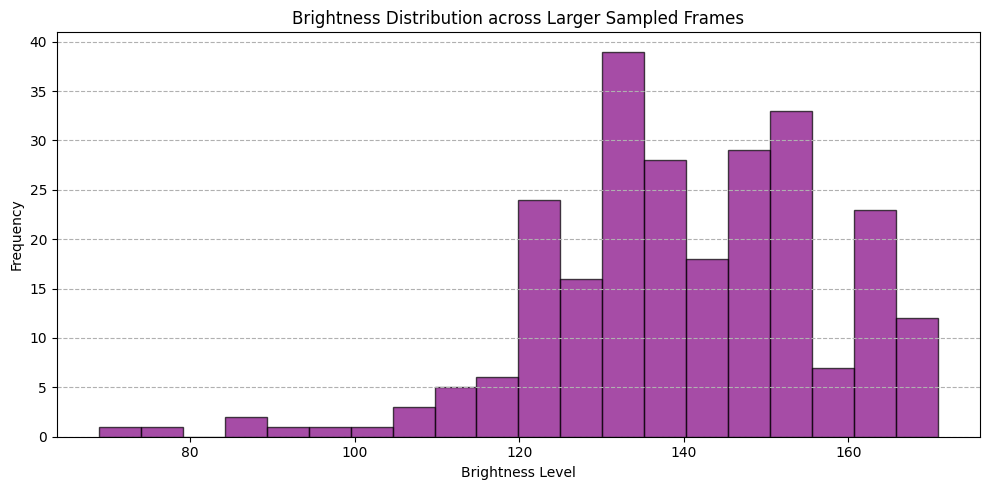

In [25]:
# Sample brightness from a larger subset of videos (sampling 50 videos for brevity)
larger_sample_video_files = video_files[:50]
brightness_values_large_sample = [get_video_brightness(os.path.join(video_dir_path, video_file)) for video_file in larger_sample_video_files]

# Flatten the list and visualize the distribution
flat_brightness_large_sample = [brightness for sublist in brightness_values_large_sample for brightness in sublist]

# Plotting the brightness distribution
plt.figure(figsize=(10, 5))
plt.hist(flat_brightness_large_sample, bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title("Brightness Distribution across Larger Sampled Frames")
plt.xlabel("Brightness Level")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


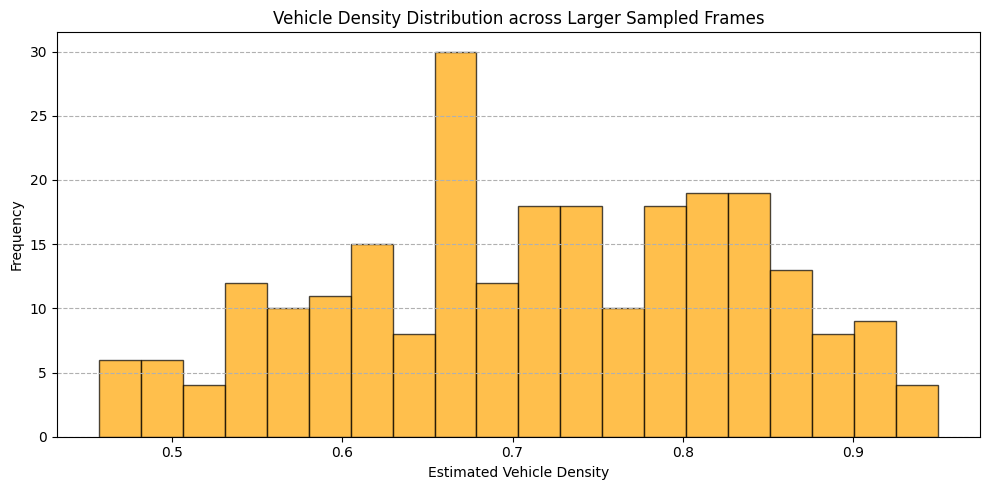

In [26]:
# Sample vehicle density estimates from a subset of videos (sampling 50 videos for brevity)
density_values_large_sample = [estimate_vehicle_density(frame)[0] for video_file in larger_sample_video_files for frame in extract_frames(os.path.join(video_dir_path, video_file))]

# Plotting the vehicle density distribution
plt.figure(figsize=(10, 5))
plt.hist(density_values_large_sample, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title("Vehicle Density Distribution across Larger Sampled Frames")
plt.xlabel("Estimated Vehicle Density")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [27]:
# Function to check if a video file is corrupt or not
def is_video_corrupt(video_path):
    try:
        # Try reading the video file
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            cap.release()
            return True
        ret, _ = cap.read()
        cap.release()
        return not ret
    except Exception as e:
        return True

# Check for corrupt video files
corrupt_videos = [video_file for video_file in video_files if is_video_corrupt(os.path.join(video_dir_path, video_file))]

corrupt_videos


[]

In [28]:
# Function to get frame rate of a video
def get_frame_rate(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()
    return fps

# Get frame rates for all videos in the dataset
all_frame_rates = [get_frame_rate(os.path.join(video_dir_path, video_file)) for video_file in video_files]

# Count the occurrences of each frame rate
frame_rate_counts = {}
for fps in all_frame_rates:
    frame_rate_counts[fps] = frame_rate_counts.get(fps, 0) + 1

frame_rate_counts

{10.0: 254}

In [30]:
# Function to check for missing frames in a video
def has_missing_frames(video_path):
    cap = cv2.VideoCapture(video_path)

    # Calculate expected number of frames
    expected_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Count actual number of frames
    actual_frames = 0
    while True:
        ret, _ = cap.read()
        if not ret:
            break
        actual_frames += 1

    cap.release()
    return expected_frames != actual_frames

# Check for missing frames in a subset of videos (sampling 50 videos for brevity)
videos_with_missing_frames = [video_file for video_file in larger_sample_video_files if has_missing_frames(os.path.join(video_dir_path, video_file))]

videos_with_missing_frames

['cctv052x2004080616x00049.avi',
 'cctv052x2004080612x00003.avi',
 'cctv052x2004080617x00064.avi',
 'cctv052x2004080608x01853.avi',
 'cctv052x2004080609x01874.avi',
 'cctv052x2004080613x00009.avi',
 'cctv052x2004080518x01670.avi',
 'cctv052x2004080617x00076.avi',
 'cctv052x2004080610x01889.avi',
 'cctv052x2004080617x00072.avi',
 'cctv052x2004080516x01646.avi',
 'cctv052x2004080609x01864.avi',
 'cctv052x2004080609x01875.avi']

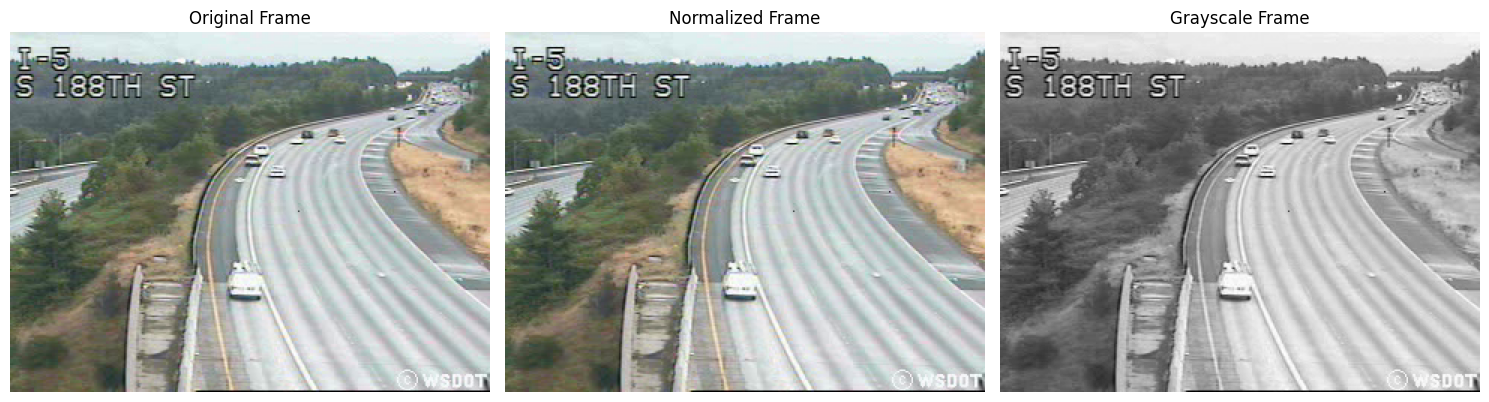

In [31]:
# Function to preprocess a frame (with corrected data type handling)
def preprocess_frame_corrected(frame):
    # Normalize pixel values to [0, 1]
    normalized_frame = frame.astype(float) / 255.0

    # Convert normalized frame to appropriate data type for grayscale conversion
    normalized_frame_uint8 = (normalized_frame * 255).astype('uint8')

    # Convert to grayscale
    grayscale_frame = cv2.cvtColor(normalized_frame_uint8, cv2.COLOR_RGB2GRAY)

    return normalized_frame, grayscale_frame

# Preprocess a sample frame using the corrected function
normalized_sample_corrected, grayscale_sample_corrected = preprocess_frame_corrected(sample_frame)

# Visualize the original, normalized, and grayscale frames
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(sample_frame)
ax1.set_title("Original Frame")
ax1.axis('off')

ax2.imshow(normalized_sample_corrected)
ax2.set_title("Normalized Frame")
ax2.axis('off')

ax3.imshow(grayscale_sample_corrected, cmap='gray')
ax3.set_title("Grayscale Frame")
ax3.axis('off')

plt.tight_layout()
plt.show()

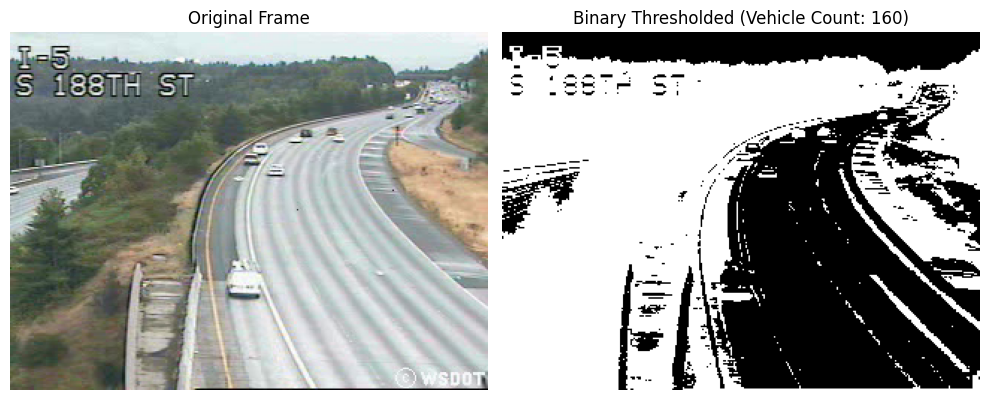

In [32]:
# Function to estimate vehicle count in a frame using binary thresholding and contour detection
def estimate_vehicle_count(frame, threshold_value=180):
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply binary thresholding
    _, binary_frame = cv2.threshold(gray_frame, threshold_value, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the binary image (potential vehicles)
    contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # The number of contours gives an estimate of the number of vehicles
    vehicle_count = len(contours)

    return vehicle_count, binary_frame

# Estimate vehicle count in a sample frame
vehicle_count_sample, binary_representation_sample = estimate_vehicle_count(sample_frame)

# Visualize the original and binary thresholded frames with vehicle count
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(sample_frame)
ax1.set_title("Original Frame")
ax1.axis('off')

ax2.imshow(binary_representation_sample, cmap='gray')
ax2.set_title(f"Binary Thresholded (Vehicle Count: {vehicle_count_sample})")
ax2.axis('off')

plt.tight_layout()
plt.show()

In [34]:
from sklearn.cluster import KMeans
import numpy as np

# Extract vehicle counts from a subset of frames (sampling 50 frames for brevity)
sample_frames_large = [extract_frames(os.path.join(video_dir_path, video_file))[0] for video_file in larger_sample_video_files]
vehicle_counts_large_sample = [estimate_vehicle_count(frame)[0] for frame in sample_frames_large]

# Reshape the data for clustering
vehicle_counts_reshaped = np.array(vehicle_counts_large_sample).reshape(-1, 1)

# Apply KMeans clustering
num_clusters = 3  # Assuming 3 patterns: low, medium, and high traffic
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(vehicle_counts_reshaped)
cluster_labels = kmeans.labels_

cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 0], dtype=int32)

In [36]:
# Function to detect outliers based on the IQR method
def detect_outliers_iqr(data):
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = [point for point in data if point < lower_bound or point > upper_bound]
    return outliers

# Detect outliers in the vehicle counts
outliers_vehicle_counts = detect_outliers_iqr(vehicle_counts_large_sample)

outliers_vehicle_counts

[]

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare dataset for time series forecasting
def create_dataset(data, look_back=3):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i+look_back)]
        X.append(a)
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

# Create dataset with a look-back of 3 intervals
look_back = 3
X, Y = create_dataset(vehicle_counts_large_sample, look_back)

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)

mse

2238.185286062823

In [38]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate the R-squared value
r2 = r2_score(Y_test, Y_pred)

mae, rmse, r2

(37.56854807497602, 47.30946296527601, -0.02978457570352333)

In [40]:
import joblib

# Define the path to save the model
model_save_path = "linear_regression_model.pkl"

# Save the model using joblib
joblib.dump(model, model_save_path)

model_save_path

'linear_regression_model.pkl'